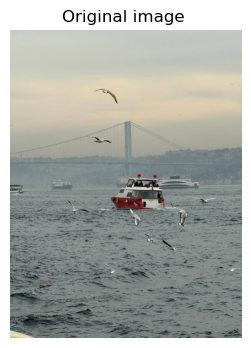

In [4]:
import cv2 
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt
img = cv2.imread("ocean.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (6,4))
plt.imshow(img_rgb)
plt.title("Original image ")
plt.axis("off")
plt.show()

In [2]:
! pip install opencv-python matplotlib


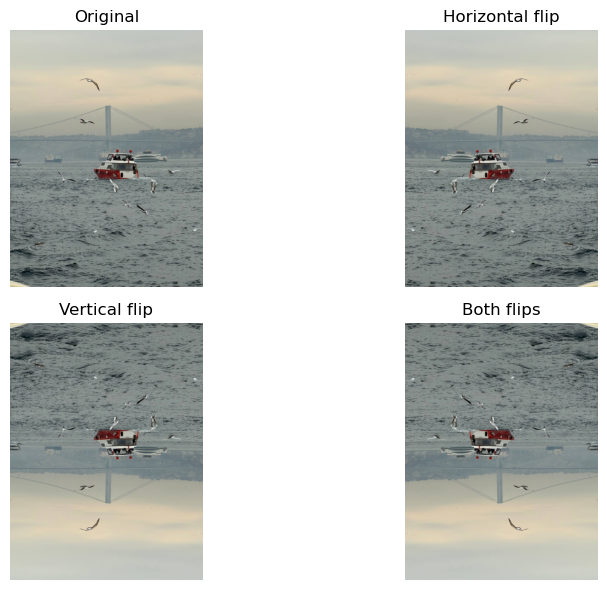

In [6]:
hflip = cv2.flip(img_rgb, 1)

vflip = cv2.flip(img_rgb, 0)

hvflip = cv2.flip(img_rgb, -1)

plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(hflip)
plt.title("Horizontal flip")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(vflip)
plt.title("Vertical flip")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(hvflip)
plt.title("Both flips")
plt.axis("off")

plt.tight_layout()
plt.show()

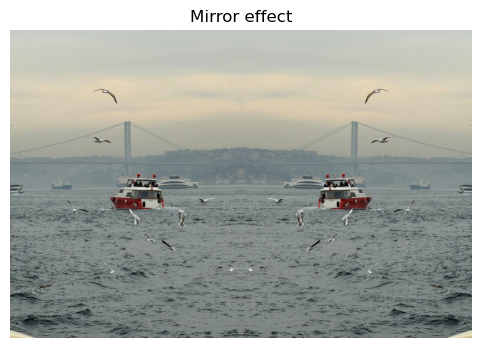

True

In [7]:
mirror = np.concatenate((img_rgb, hflip), axis=1)

plt.figure(figsize=(8,4))
plt.imshow(mirror)
plt.title("Mirror effect")
plt.axis("off")
plt.show()

cv2.imwrite("mirror_output.jpg", cv2.cvtColor(mirror, cv2.COLOR_RGB2BGR))

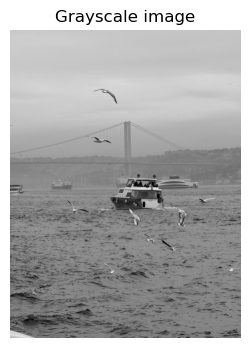

In [8]:
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(5,4))
plt.imshow(gray, cmap="gray")
plt.title("Grayscale image")
plt.axis("off")
plt.show()

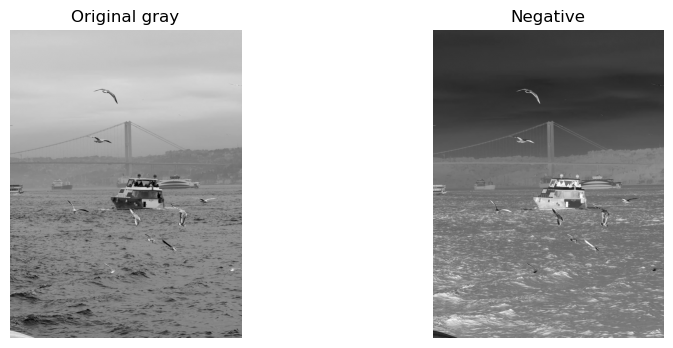

True

In [9]:
negative = 255 - gray

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(negative, cmap='gray')
plt.title("Negative")
plt.axis("off")

plt.show()

cv2.imwrite("negative.jpg", negative)

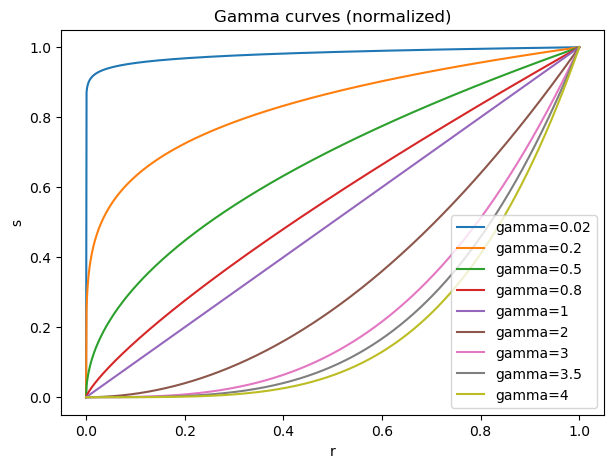

In [10]:
gammas = [0.02, 0.2, 0.5, 0.8, 1, 2, 3, 3.5, 4]

r = np.linspace(0,1,1000)

plt.figure(figsize=(7,5))
for g in gammas:
    s = r**g
    plt.plot(r, s, label=f"gamma={g}")

plt.title("Gamma curves (normalized)")
plt.xlabel("r")
plt.ylabel("s")
plt.legend()
plt.show()

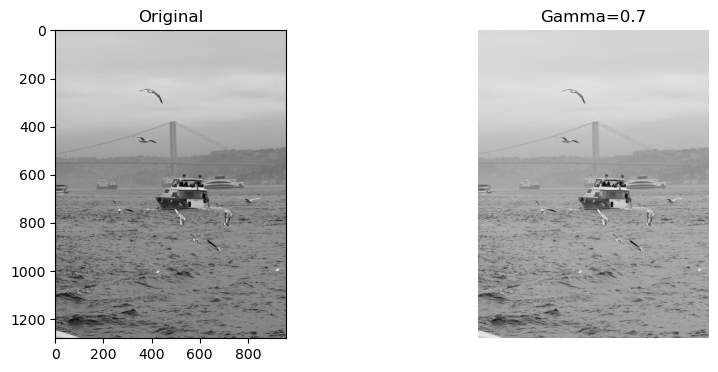

True

In [11]:
gamma = 0.7

gray_norm = gray / 255.0

gamma_img = np.power(gray_norm, gamma)

gamma_img = np.uint8(gamma_img * 255)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(gamma_img, cmap='gray')
plt.title(f"Gamma={gamma}")

plt.axis("off")
plt.show()

cv2.imwrite("gamma_output.jpg", gamma_img)

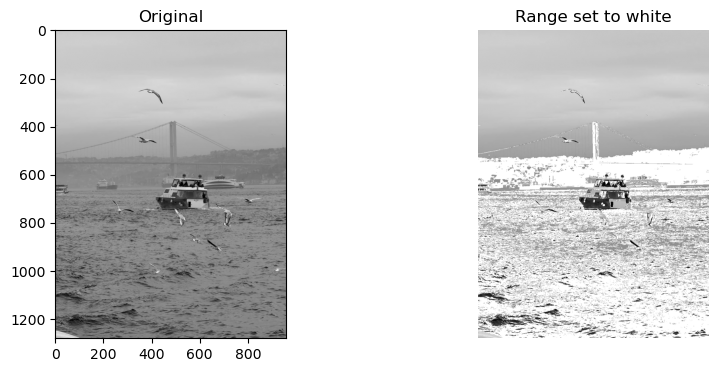

True

In [12]:
A = 80
B = 140

range_img = gray.copy()

mask = (range_img >= A) & (range_img <= B)
range_img[mask] = 255

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(range_img, cmap='gray')
plt.title("Range set to white")

plt.axis("off")
plt.show()

cv2.imwrite("range_output.jpg", range_img)

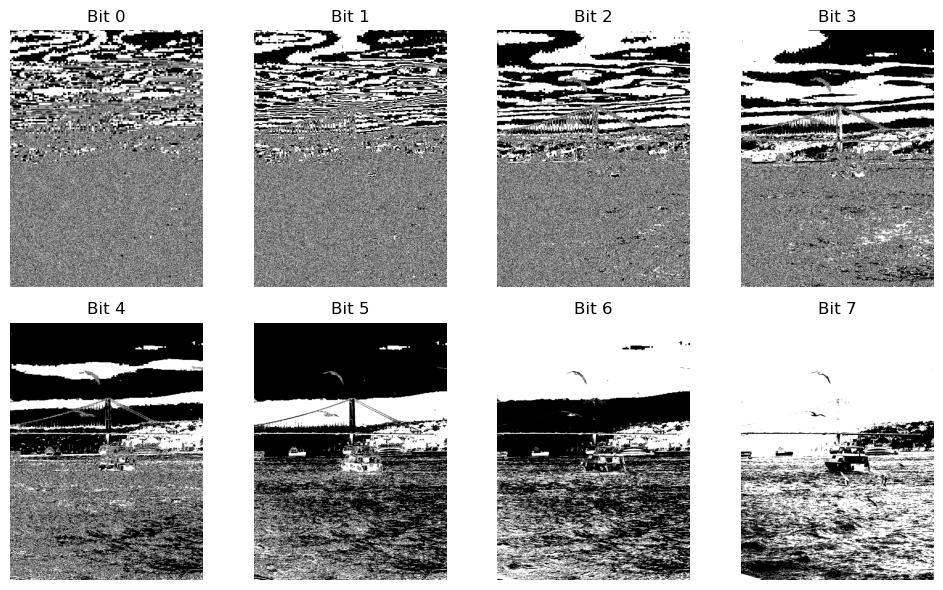

In [13]:
plt.figure(figsize=(10,6))

for k in range(8):
    bit = ((gray >> k) & 1) * 255

    plt.subplot(2,4,k+1)
    plt.imshow(bit, cmap='gray')
    plt.title(f"Bit {k}")
    plt.axis("off")

plt.tight_layout()
plt.show()